In [ ]:
'''Apply transter leammg With pre-tmrned VGG16:ResNet50 Mob11eNet model on gtven dataset and analyze the results.'''

In [18]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [23]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [24]:
# Normalize pixel values to range 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [25]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [26]:
# Load base models
def create_model(base_model):
    # Freeze all the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers on top of the base model
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)  # Add dropout for regularization
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)

    # Create the new model
    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [27]:
# Create VGG16, ResNet50, and MobileNet models
vgg16_model = create_model(VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3)))
resnet50_model = create_model(ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3)))
mobilenet_model = create_model(MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3)))

<ipython-input-27-96cce025ea21>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = create_model(MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3)))


In [28]:
# Train all models
def train_model(model, x_train, y_train, x_test, y_test):
    return model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))



In [31]:
print("VGG 16")
vgg16_history = train_model(vgg16_model, x_train, y_train, x_test, y_test)
print("ResNet 50")
resnet50_history = train_model(resnet50_model, x_train, y_train, x_test, y_test)
print("mobile net")
mobilenet_history = train_model(mobilenet_model, x_train, y_train, x_test, y_test)

VGG 16
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3518 - loss: 1.8170 - val_accuracy: 0.4812 - val_loss: 1.5301
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.4212 - loss: 1.6521 - val_accuracy: 0.5009 - val_loss: 1.4377
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4493 - loss: 1.5551 - val_accuracy: 0.5233 - val_loss: 1.3785
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4775 - loss: 1.4973 - val_accuracy: 0.5318 - val_loss: 1.3420
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4900 - loss: 1.4575 - val_accuracy: 0.5446 - val_loss: 1.3111
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5118 - loss: 1.4139 - val_accuracy: 0.5522 - val_loss: 1.2848
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5186 - loss: 1.3861 - val_accuracy: 0.5575 - val_loss: 1.2666
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5281 - loss: 1.36

In [32]:
def evaluate_model(model, x_test, y_test, model_name):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"{model_name} Test accuracy: {test_acc * 100:.2f}%")

In [33]:
evaluate_model(vgg16_model, x_test, y_test, "VGG16")
evaluate_model(resnet50_model, x_test, y_test, "ResNet50")
evaluate_model(mobilenet_model, x_test, y_test, "MobileNet")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5752 - loss: 1.2239
VGG16 Test accuracy: 57.47%
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3434 - loss: 1.8500
ResNet50 Test accuracy: 33.60%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2286 - loss: 2.1424
MobileNet Test accuracy: 22.50%


In [34]:
# Plot training history
def plot_history(history, model_name):
    plt.plot(history.history['accuracy'], label=f'{model_name} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{model_name} Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label=f'{model_name} Train Loss')
    plt.plot(history.history['val_loss'], label=f'{model_name} Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

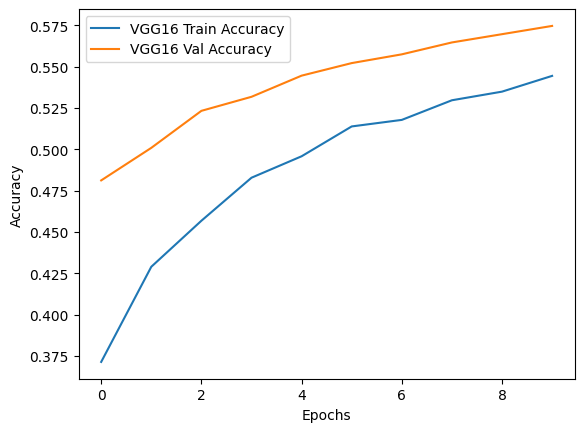

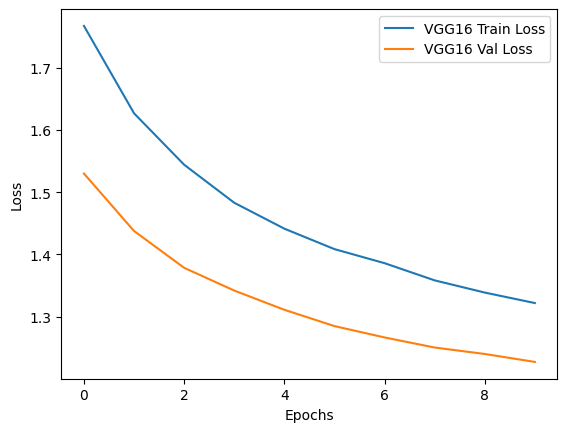

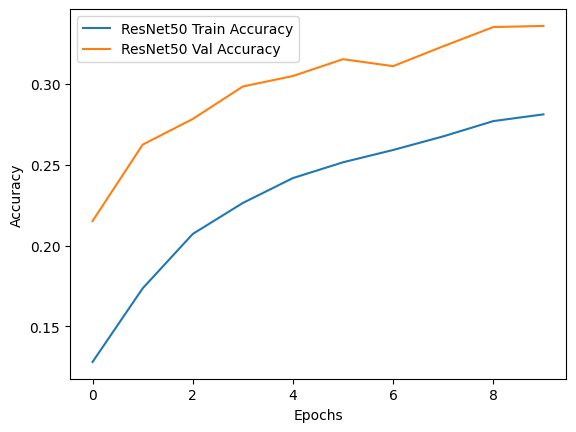

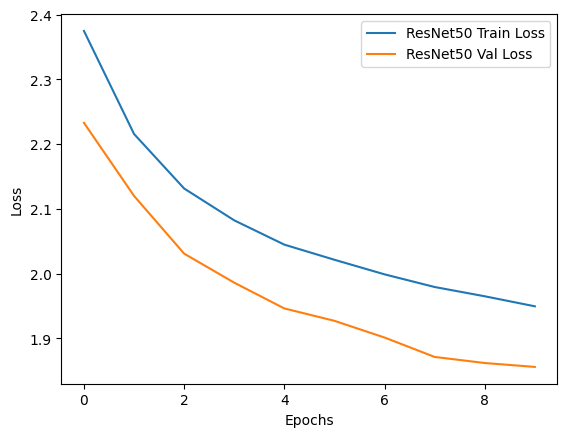

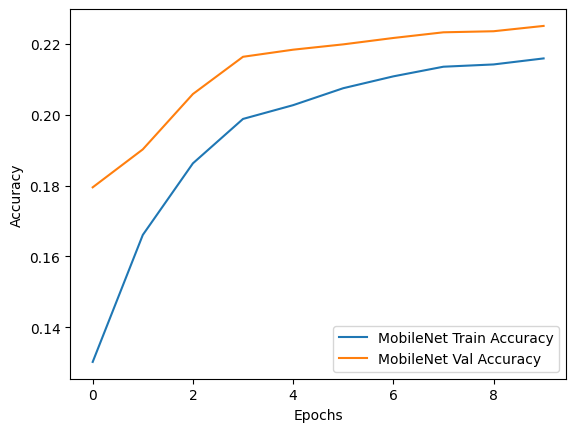

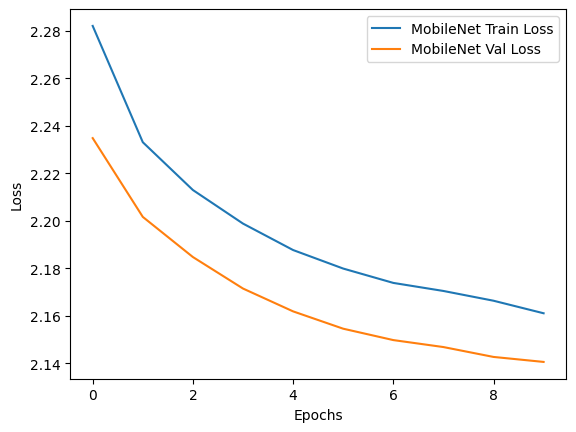

In [35]:
plot_history(vgg16_history, "VGG16")
plot_history(resnet50_history, "ResNet50")
plot_history(mobilenet_history, "MobileNet")

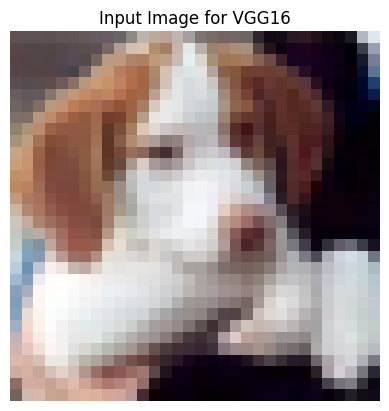

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
VGG16 Predicted class: Dog


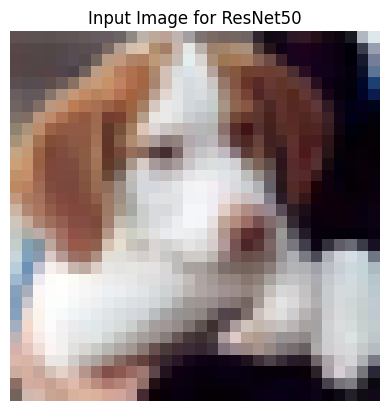

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
ResNet50 Predicted class: Dog


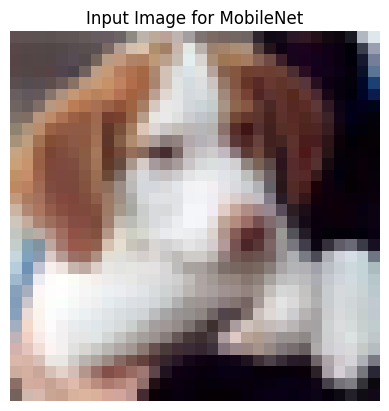

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
MobileNet Predicted class: Dog


In [36]:
# Function to preprocess and predict a custom image
def predict_custom_image(image_path, model, class_labels, model_name):
    img = load_img(image_path, target_size=(32, 32))  # Resize to 32x32
    plt.imshow(img)
    plt.title(f"Input Image for {model_name}")
    plt.axis("off")
    plt.show()

    img_array = img_to_array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = img_array.reshape((1, 32, 32, 3))

    prediction = model.predict(img_array)
    predicted_class = tf.argmax(prediction, axis=1).numpy()[0]

    print(f"{model_name} Predicted class: {class_labels[predicted_class]}")

# CIFAR-10 class labels
cifar10_labels = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Provide the path to your image
image_path = "/content/test.jpeg"  # Replace with the actual path to your image

# Predict the class for each model
predict_custom_image(image_path, vgg16_model, cifar10_labels, "VGG16")
predict_custom_image(image_path, resnet50_model, cifar10_labels, "ResNet50")
predict_custom_image(image_path, mobilenet_model, cifar10_labels, "MobileNet")